In [4]:
import PIL

In [22]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

# plt.rc('font', family='NanumMyeongjoOTF') # For MacOS
# print(plt.rcParams['font.family'])

plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])

['NanumMyeongjo']


In [5]:
PIL.__version__

'9.5.0'

이미지 읽고 쓰기

In [8]:
from IPython.display import Image
import requests

In [13]:
import urllib.request
from IPython.display import Image

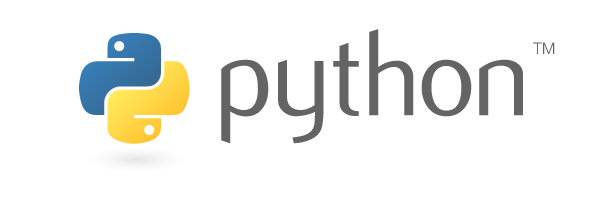

In [14]:
url = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
filename = "logo.png"

urllib.request.urlretrieve(url, filename)
Image(filename=filename)

In [15]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

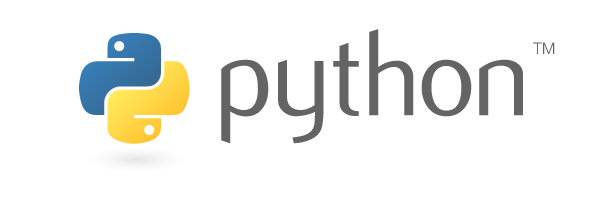

In [16]:
img_logo_png

In [18]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용

NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.

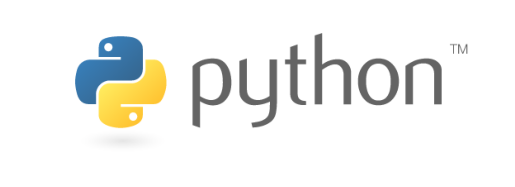

In [23]:
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis('off')
plt.show()

NumPy 배열을 Image 객체로 바꿀 때는 fromarray 클래스 메서드를 사용한다

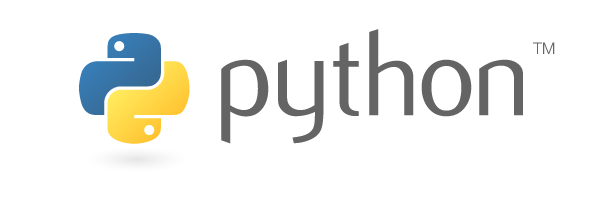

In [24]:
Image.fromarray(img_logo_array)

이미지 크기 변환

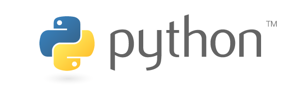

In [26]:
img_logo_png2 = img_logo_png.resize((300,100))
img_logo_png2

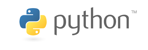

In [27]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

이미지 회전(rotate)

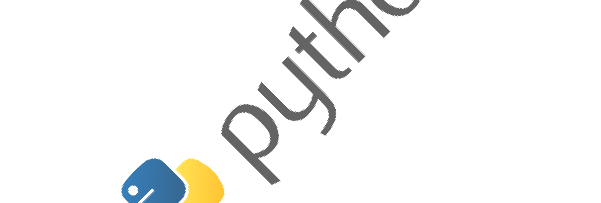

In [29]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

이미지 잘라내기(crop)

좌-> 상-> 우-> 하

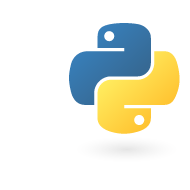

In [30]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

# scikit-Image

In [32]:
# !pip install scikit-image

                                              0.0/22.8 MB ? eta -:--:--
     -                                        1.0/22.8 MB 20.0 MB/s eta 0:00:02
     -----                                    3.1/22.8 MB 32.6 MB/s eta 0:00:01
     ---------                                5.3/22.8 MB 37.4 MB/s eta 0:00:01
     ------------                             7.3/22.8 MB 38.6 MB/s eta 0:00:01
     ---------------                          9.1/22.8 MB 38.9 MB/s eta 0:00:01
     ------------------                      10.9/22.8 MB 43.5 MB/s eta 0:00:01
     ----------------------                  13.1/22.8 MB 43.5 MB/s eta 0:00:01
     -----------------------                 13.6/22.8 MB 43.7 MB/s eta 0:00:01
     -----------------------                 13.6/22.8 MB 43.7 MB/s eta 0:00:01
     -----------------------                 13.7/22.8 MB 28.5 MB/s eta 0:00:01
     ---------------------------             15.8/22.8 MB 28.5 MB/s eta 0:00:01
     ------------------------------          17.

In [33]:
import skimage
skimage.__version__

'0.21.0'

샘플 이미지

Scikit-Image는 data라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 NumPy 배열 자료형으로 사용

In [34]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

이미지 읽고 쓰기

In [56]:
help(skimage.data)

Help on package skimage.data in skimage:

NAME
    skimage.data - Test images and datasets.

DESCRIPTION
    A curated set of general purpose and scientific images used in tests, examples,
    and documentation.
    
    Newer datasets are no longer included as part of the package, but are
    downloaded on demand. To make data available offline, use :func:`download_all`.

PACKAGE CONTENTS
    _binary_blobs
    _fetchers
    _registry
    tests (package)

FUNCTIONS
    astronaut()
        Color image of the astronaut Eileen Collins.
        
        Photograph of Eileen Collins, an American astronaut. She was selected
        as an astronaut in 1992 and first piloted the space shuttle STS-63 in
        1995. She retired in 2006 after spending a total of 38 days, 8 hours
        and 10 minutes in outer space.
        
        This image was downloaded from the NASA Great Images database
        <https://flic.kr/p/r9qvLn>`__.
        
        No known copyright restrictions, released int

Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 imsave, imread 명령을 사용한다.

파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환한다.

In [36]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

색공간 변환

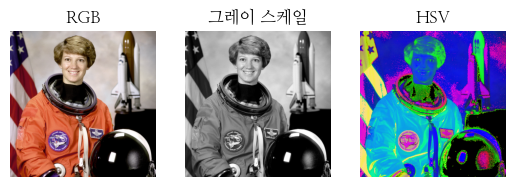

In [39]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis('off')
plt.title('RGB')

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis('off')
plt.title('그레이 스케일')

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis('off')
plt.title('HSV')

plt.show()

In [42]:
import cv2
cv2.__version__

'4.7.0'

In [43]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

In [44]:
# 채널 분리
b, g, r = cv2.split(img_astro3)

# b, r을 바꿔서 Merge
img_astro3_rgb = cv2.merge([r,g,b])

cvtColor 명령을 사용하면 더 간단하게 색공간을 변환

In [50]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

이미지 파일을 만들 때는 imwrite 명령을 사용

In [51]:
cv2.imwrite('./gray_astronaut.png', img_astro3_gray)

True

이미지 크기 변환

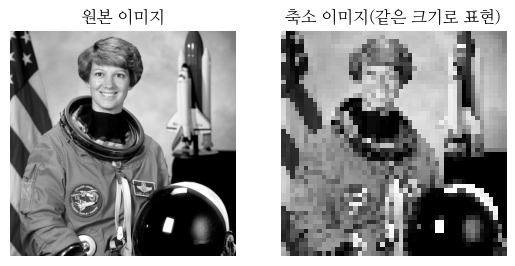

In [53]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title('축소 이미지(같은 크기로 표현)')
plt.axis('off')

plt.show()